In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import pickle

In [2]:
with open('../data/var1.pkl', 'rb') as file:
    train, test, e_params, t_params, ft_params = pickle.load(file)

In [3]:
# операция обратная стандартизации для восстановления результата
def restore_result(e_vals):
    return e_vals * e_params[1] + e_params[0]

# Сезонно-наивная модель (SNAIVE)

SNAIVE является расширением наивной модели и предполагает каждый прогноз равным последнему наблюдаемому значению того же сезона - в данном случае, того же дня прошлого года:

$y_{t} = y_{t-T}$ ,

где $T=365$ - период сезонности.

SNAIVE будет использована как ориентировочная модель, с которой будут сравниваться остальные методы.


In [4]:
def snaive(data):
    y = data['E'][-365:]
    
    return y

In [5]:
def predict_snaive():
    predicted = restore_result(snaive(train)).to_numpy()
    
    return predicted

In [6]:
predicted = predict_snaive()

            |    RMSE    |  MAPE (%)  | PBias (%)  |     R2     
------------|------------|------------|------------|------------
   SNAIVE   |  774.473   |   5.243    |   1.212    |   0.752    



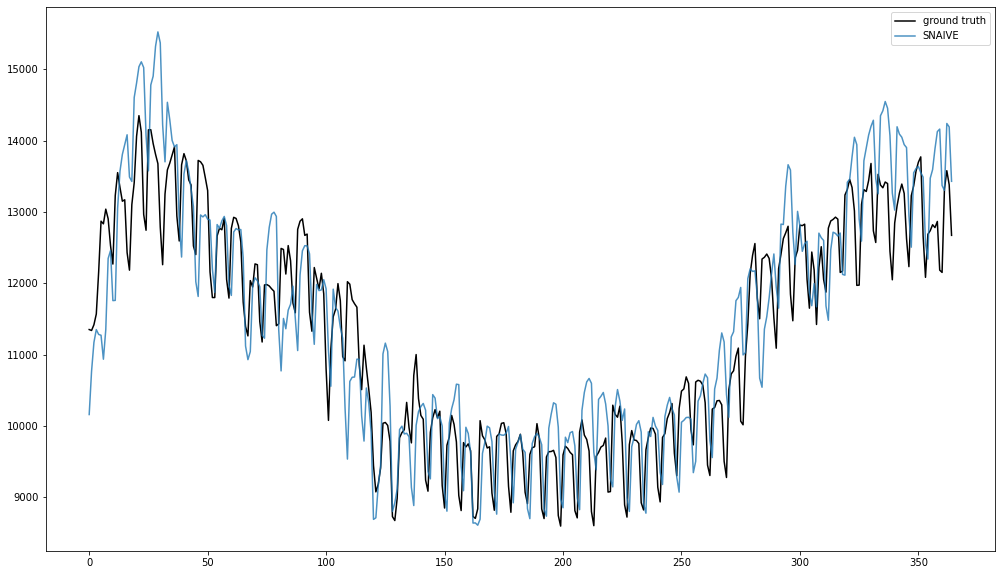

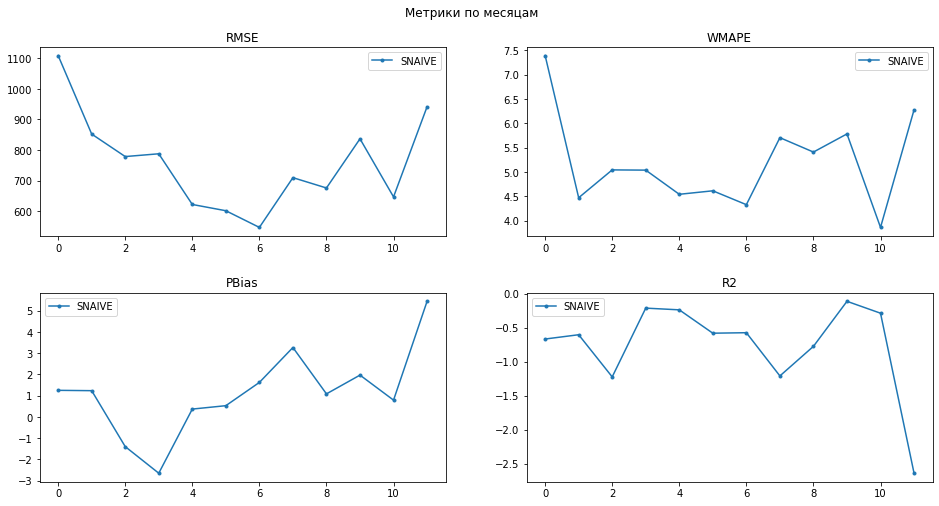

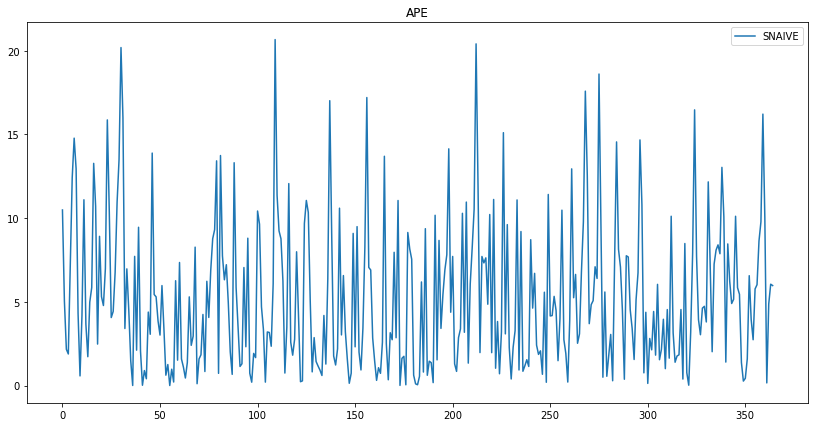

In [7]:
%run evaluate_forecasts.ipynb

labels_restored = restore_result(test['E'].to_numpy())
evaluate_forecasts(labels_restored, [predicted], ['SNAIVE'])